<a href="https://colab.research.google.com/github/Shruthi973/HDS5210-02-Assignments/blob/main/Shruthi_final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDS 5210 - 2024 - Final Project

# Project Description
The study addresses the complex challenge of obesity classification and risk assessment in healthcare settings, utilizing two distinct datasets: an individual level data set which included various anthropometrics and lifestyle variables and a second population level data set which look at obesity trend across different ages. The first goal was to achieve an optimally suited and statistically sound classification system that would categorize the respondents into different levels of obesity and at the same highlight other influential factors.

The technical difficulty was to map and transform various: categorical lifestyle variables and continuous physical assessment into consistent analytical framework. This entailed fine tuning of raw data, and the creation of indices to accommodate complexity of obesity risk indicators. The goal of the project was to create interaction between particular health state and overall tendencies of the population.

The application of the results of this work is relevant in the field of primary care and methods for the early detection of obesity risk factors, as well as accuracy in classification. Ideally the project aimed for the development of a grading framework that not only grades obesity in its present stage but also helps in assessing the significance of factors leading to obesity so as to support diagnostic as well as preventive healthcare management.

# Datasets

Dataset 1 (ObesityDataSet_raw_and_data_sinthetic.csv) contains individual collected data which have several life style and physical characteristics of obesity. It has 17 attribute, which are personal information such as gender, age, height, weight, FAVC—frequent consumption of high caloric food, FCVC—frequency of vegetable consumption, NCP number of main meal, physical activities such as FAF—physical activity frequency, TUE—time using technology devices, SMOKE—smoking habits, MTRANS – mode of transport used. The variable ‘NObeyesdad’ represents the obesity level of each person making this data set appropriate for obesity classification and risk factor datasets.


Dataset 2 (Obesity_among_children_and_adolescents_aged_2_19_years__by_selected_characteristics__United_States.xlsx) It holds 16 columns having demographic indicators (AGE, STUB_LABEL), unit measurements (UNIT), timeinformation (YEAR), statistical metrics (ESTIMATE, SE - standard error). This dataset is suitable for monitoring obesity trends by demographic characteristics and times aiding public health professionals in planning and forecasting.


Links for the datasets

Obesity among children and adolescents aged 2–19 years, by selected characteristics: United States. https://catalog.data.gov/dataset/obesity-among-children-and-adolescents-aged-219-years-by-selected-characteristics-united-s-3ead4
Obesity Levels & Life Style. https://www.kaggle.com/code/mpwolke/obesity-levels-life-style/input?select=ObesityDataSet_raw_and_data_sinthetic.csv




In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
df_1 = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df_1.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [31]:
df_2 = pd.read_excel("/content/Obesity_among_children_and_adolescents_aged_2_19_years__by_selected_characteristics__United_States.xlsx")
df_2.columns

Index(['INDICATOR', 'PANEL', 'PANEL_NUM', 'UNIT', 'UNIT_NUM', 'STUB_NAME',
       'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'STUB_LABEL', 'YEAR', 'YEAR_NUM',
       'AGE', 'AGE_NUM', 'ESTIMATE', 'SE', 'FLAG'],
      dtype='object')

# Joining by using age

The first join operation used is particularly important for merging individual weight data with over Obesity rate statistics by the age groups at the population level. First, in the first dataset (df_1), the age is classified as age groups within the small interval age classifiers (0-19, 20-30, 31-40, 41-50, & 50 +) using pd.cut(). Such categorization is useful for comparison with the second data set that provided age-related statistics right from the beginning.

The following process generates descriptive statistics that can easily be compared with the population data by computing the mean weight for the age groups using the groupby() and mean() from the individual dataset. This aggregation brings down the variables of individual level to a format that can be matched with the population level statistics in the second set.

The joining process then subset the second dataset (df_2) to remove rows with missing ‘age’ column, for a clean merged dataset. In the end, the merge operation works to merge this pair of processed datasets based on the overall age groupings outlined above using a left join so that all of the first dataset’s age groups are retained while corresponding population-level statistics are included as well as the second dataset allows. This join allows one to compare some average weights at the individual level to obesity rates within the same age groups at a population level in the sample level to national level statistics.

In [32]:
# First Join: Create age groups in df_1 and join with df_2 based on age
df_1['age_group'] = pd.cut(df_1['Age'], bins=[0, 19, 30, 40, 50, 100], labels=['0-19', '20-30', '31-40', '41-50', '50+'])
age_stats = df_1.groupby('age_group')['Weight'].mean().reset_index()
df_2_filtered = df_2[df_2['AGE'].notna()]
first_joined = pd.merge(age_stats, df_2_filtered, left_on='age_group', right_on='AGE', how='left')

first_joined.head()

<ipython-input-32-140d16670cd5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = df_1.groupby('age_group')['Weight'].mean().reset_index()


,age_group,Weight,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL_NUM,STUB_LABEL,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG
0,0-19,72.041731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20-30,89.698126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31-40,92.297272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41-50,89.876171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50+,78.101559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Joining the obesity levels with the original dataset

The second join operation is to include the average weight information of each obesity category, which forms a comparison dataset within the dataset. It starts by estimating the mean weight for each obesity level (NObeyesdad) from the raw data set which in fact serves the purpose of a reference in defining an average weight given a particular type of obesity classification.

When this aggregated information is merged back into a single database using the pd.merge() function, each record is supplement by an additional attribute, Weight_avg, calculated as the average weight for the obesity class to which the record belongs. The merge is done using the ‘NObeyesdad’field as the merging key so that each record matches the correct average of the categories. Suffixes ensure that there does not arise the conflict of column name with the original weight values and the newly created averages are given the ’_avg’ suffix.

Of all the join operations, this type is very beneficial for analysis since it permits one to compare weight information with average obesity category weight directly. For instance, if looking at the sample data, we distinguish the entries of different obesity levels and the individual weights and category averages for the obesity levels are detected. This structure allows a researcher to spot people who may be close to the categorization limit or may present somewhat anomalous cases that could be useful for further analysis. It also helps to gain understanding of how specific each case is to the given obesity category that they were assigned to.

In [33]:
# Second Join: Join obesity levels with original dataset
obesity_categories = df_1.groupby('NObeyesdad')['Weight'].mean().reset_index()
second_joined = pd.merge(df_1, obesity_categories, on='NObeyesdad', suffixes=('', '_avg'))

second_joined.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,age_group,Weight_avg
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,20-30,62.155052
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,20-30,62.155052
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,20-30,62.155052
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,20-30,74.266828
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,20-30,82.085271


# Aggregation for calculating obesity by gender

The first derived aggregation operation calculates standard statistical measures by gender serving as a basis to compare the physical characteristics of males and females presented in the dataset. Finally for each gender it shows the mean and standard deviation of weight and height, average age, the result of which is that the mean weight and height of male are higher than the female with the average age nearly of 24 years in both sex and there is not much difference between both sex in the age deviation.

In [34]:
# First Aggregation: Calculate obesity statistics by gender
gender_stats = df_1.groupby('Gender').agg({
    'Weight': ['mean', 'std'],
    'Height': ['mean', 'std'],
    'Age': 'mean'
}).reset_index()

gender_stats.head()

Gender     Weight               Height                  Age
                mean        std      mean       std       mean
0  Female  82.302364  29.723904  1.643298  0.074509  24.001907
1    Male  90.769478  21.407030  1.758690  0.072174  24.616020

# Calculating BMI

The first change computes the body mass index (BMI) on every targeted participant with the aid of the conventional weight plus height equations. Humans use this to form a simple index of body fat based on weight and height and from the sample data indicated BMI ranging from normal weight, which is about 24 to overweight that is about 28, very vital from the obesity classification aspect as well as the health risks.

In [35]:
# First Transformation: Calculate BMI
df_1['BMI'] = df_1['Weight'] / (df_1['Height'] ** 2)
df_1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,age_group,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,20-30,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,20-30,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,20-30,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,20-30,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,20-30,28.342381


# Calculating Physical activity score


The second transformation derives an activity score using the physical activity frequency factor (FAF) and the pro-technology usage time factor (TUE) with appropriate weights of 0.6 and 0.4 respectively. This summary index offers one value for judging an individual’s PA/SED ratio, with higher scores demonstrating a higher PA/SED ratio and lower scores suggesting a more sedentary existence.

In [36]:
# Second Transformation: Create physical activity score
df_1['activity_score'] = df_1['FAF'] * 0.6 + df_1['TUE'] * 0.4
df_1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,age_group,BMI,activity_score
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,20-30,24.386526,0.4
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,20-30,24.238227,1.8
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,20-30,23.765432,1.6
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,20-30,26.851852,1.2
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,20-30,28.342381,0.0


# Converting Categorical variable to numeric

FAVC, CAEC, SMOKE, SCC, CALC, MTRANS categorical variables are changed to numeric ones using the Label Encoding technique in the third transformation, which is essential as this kind of data is not applicable for statistical analysis as well as for most machine learning algorithms. This conversion preserves categorical data but necessitates a format suitable for NA and this is however important to remember that the numbers that represent the data do not differentially order the categories.

In [37]:
# Third Transformation: Convert categorical variables to numeric
categorical_cols = ['FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
for col in categorical_cols:
    le = LabelEncoder()
    df_1[f'{col}_encoded'] = le.fit_transform(df_1[col])

# Calculating Risk score

Risk score transformation, is calculated from BMI and family history of overweight with coefficients of 0.4 and 0.6 respectively. This BMI based risk score tries to sum up an individual’s obesity risk which is influenced by genetics and history of obesity in first degree relatives and thus, a higher risk score would possibly mean a higher risk of obesity related health problems.

In [38]:
# Fourth Transformation: Create risk score
df_1['risk_score'] = df_1['BMI'] * 0.4 + df_1['family_history_with_overweight'].map({'yes': 1, 'no': 0}) * 0.6
df_1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,age_group,BMI,activity_score,FAVC_encoded,CAEC_encoded,SMOKE_encoded,SCC_encoded,CALC_encoded,MTRANS_encoded,risk_score
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,20-30,24.386526,0.4,0,2,0,0,3,3,10.354611
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,20-30,24.238227,1.8,0,2,1,1,2,3,10.295291
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,20-30,23.765432,1.6,0,2,0,0,1,3,10.106173
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,20-30,26.851852,1.2,0,2,0,0,1,4,10.740741
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,20-30,28.342381,0.0,0,2,0,0,2,3,11.336952


# Normalizing the numerical features

The fifth transformation standardization is done in Numerical features by StandardScaler, which scales the data to unit variance. This standardization is particularly important for machine learning algorithms to scale all the numerical features equally, rather than using the absolute extent which tends to overpower characteristics with large numeric ranges such as age, height and weight seen in the scaled data set.

In [39]:
# Fifth Transformation: Normalize numerical features
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O']
scaler = StandardScaler()
df_1[numerical_cols] = scaler.fit_transform(df_1[numerical_cols])

df_1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,age_group,BMI,activity_score,FAVC_encoded,CAEC_encoded,SMOKE_encoded,SCC_encoded,CALC_encoded,MTRANS_encoded,risk_score
0,Female,-0.522124,-0.875589,-0.862558,yes,no,-0.785019,0.404153,Sometimes,no,...,20-30,24.386526,0.4,0,2,0,0,3,3,10.354611
1,Female,-0.522124,-1.947599,-1.168077,yes,no,1.088342,0.404153,Sometimes,yes,...,20-30,24.238227,1.8,0,2,1,1,2,3,10.295291
2,Male,-0.206889,1.054029,-0.366090,yes,no,-0.785019,0.404153,Sometimes,no,...,20-30,23.765432,1.6,0,2,0,0,1,3,10.106173
3,Male,0.423582,1.054029,0.015808,no,no,1.088342,0.404153,Sometimes,no,...,20-30,26.851852,1.2,0,2,0,0,1,4,10.740741
4,Male,-0.364507,0.839627,0.122740,no,no,-0.785019,-2.167023,Sometimes,no,...,20-30,28.342381,0.0,0,2,0,0,2,3,11.336952


# Pivot Table of obesity levels by age group and gender

The second accumulation forms a pivot table that fits all the average BMI to age and gender categories and shows clear patterns of how BMI differs between these segments. This two-way analysis thus enables comparison of BMI trends cross sectionally and longitudinally by gender across the various life stages.

When regarding the female pattern of BMI, the initial value is roughly 25.83 in the age group of 0-19, the energy value is 31.78 in the age group of 20-30, then we have 31.12 in the age group of 41-50, 28.13 in the age group of 31-40, at last, 24.83 in the groups of 50+. From this pattern, we can infer that women in the dataset seem to hit their highest BMI at the age of twenty and forty.

For the males, the BMI was slightly lower at 23.33 in the 0-19 age group and progressively rises and peak at 34.30 in the 41-50 age group then dropped to 27.84 in the 50+age group. The fact that BMI gradually rises throughout the age range up to the 50+ group indicates that the dataset shows that men will tend to gain higher BMIs as they age through their middle years.

The pivot table also provides gender-specific results in each age group; females have bigger BMI means in the 0-19 and 20-30 age groups while males have bigger BMI means in the 31-40 and 41-50 age groups. This could be helpful for designing age and sex differentiated prevention interventions in obesity.


In [40]:
# Second Aggregation: Pivot table of obesity levels by age group and gender
pivot_table = pd.pivot_table(df_1,
                           values='BMI',
                           index='Gender',
                           columns='age_group',
                           aggfunc='mean')

pivot_table.head()

<ipython-input-40-e4e8e665b5ac>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df_1,


age_group,0-19,20-30,31-40,41-50,50+
Gender,,,,,
Female,25.826558,31.784081,28.127720,31.121374,24.827080
Male,23.327370,29.812389,33.260401,34.302267,27.836802


# BMI Distribution

A histogram of the BMIs of all the people in the data set is displayed (BMI Distribution). The frequency distribution of BMI is also positively skewed, as most of the subjects possess BMI within the range of 20-35 and most of them are grouped in the range of 25-30 that indicates overweight as per current BMI categorizations.
These dimensions overlap over 45, but the right tail shows that there are many subjects falling in the ‘obese’ binette category (despite lesser frequency for every additional BMI unit). This consistent pattern indicates that though obesity exists in the population, there are few extremes in the scale, with the majority of the population being over weight to moderately obese.

Text(0.5, 1.0, 'BMI Distribution')

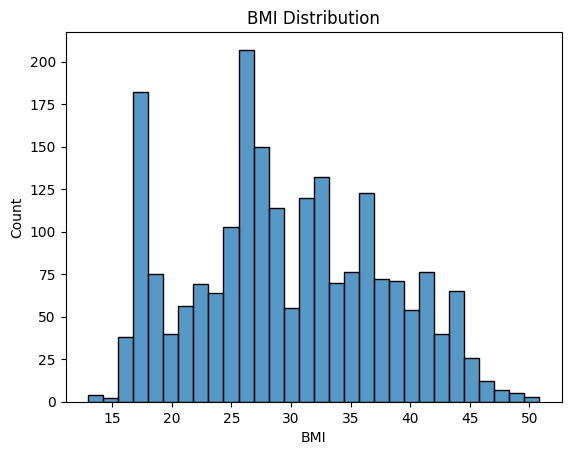

In [41]:
sns.histplot(data=df_1, x='BMI', bins=30)
plt.title('BMI Distribution')

# BMI by Gender

BMI by Gender displays a side by side box plot that compares for BMI of males and females exclusively. The box plot reveals somewhat again larger final box and longer whiskers in the female class which mean larger dispersion in the body mass dataset among females. The median accounted for body mass index seems to be the same between woman and men but slightly inclined to woman.
This suggests skews results and the outliers spotted, particularly in the upper end of the bar for each gender, show extreme cases of high BMI. The boxes, illustrating the IQR, indicate that the variability of BMI within the central 50% is greater among females than among males, which points to greater variability in body composition among women in the sample.

Text(0.5, 1.0, 'BMI by Gender')

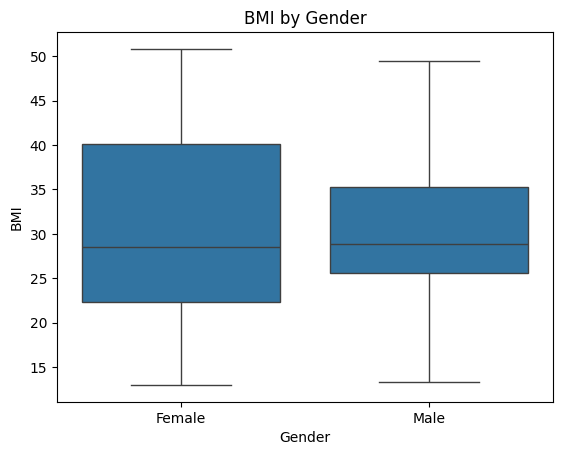

In [42]:
sns.boxplot(data=df_1, x='Gender', y='BMI')
plt.title('BMI by Gender')

# Activiy Score vs BMI

Activity Score vs BMI also maps a scatter plot that explores the correlation between physical activity scores and BMI. Activity level data provide an apparently contradictory but somewhat more telling picture; the different shapes of the surface and a vast number of points scattering significantly do not allow confusing activity level with BMI. There looked like a small inverse relationship, indicating that higher levels of activity may be seen alongside lower BMIs.
The peaked nature of the vertical bands may imply that activity scores are rounded to some measure and therefore have large variation only within that measure. Standard deviations for BMI at each of the activity levels are large, which proves that people with similar activity levels may have very different BMI.

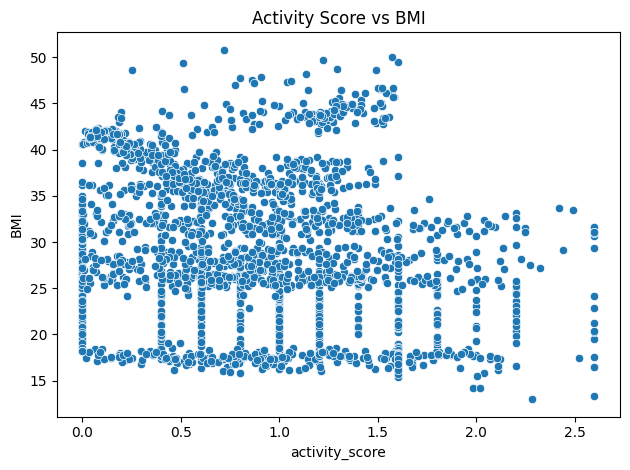

In [43]:
sns.scatterplot(data=df_1, x='activity_score', y='BMI')
plt.title('Activity Score vs BMI')
plt.tight_layout()
plt.show()

# Correlation Matrix

Correlation Matrix, all information is presented in a more obvious way and as a heatmap shows correlation between various numerical features of the dataset. Circumference has the highest significant positive correlation with Height; Weight registered the highest correlation of 0.46 with Height, one expects this correlation to be relatively high since both variables have the same universal association. There are also trends combining the variables with negative regression coefficients with Age and TUE (Technology Use Time) at -0.30, meaning that older people categorized in the dataset use technology for a shorter time.
Most of the correlations are low (Most of the values are under 0.3, which corresponds to the light colors in the matrix). This has an implication that most of the existing variables in the dataset are relatively autonomous of each other, a property that can be of significant value when performing statistical tests, including checks for multicollinearity. The diagonal perfect correlation (1.0) influence was noticed because this reflects one’s correlation of each chosen variable.

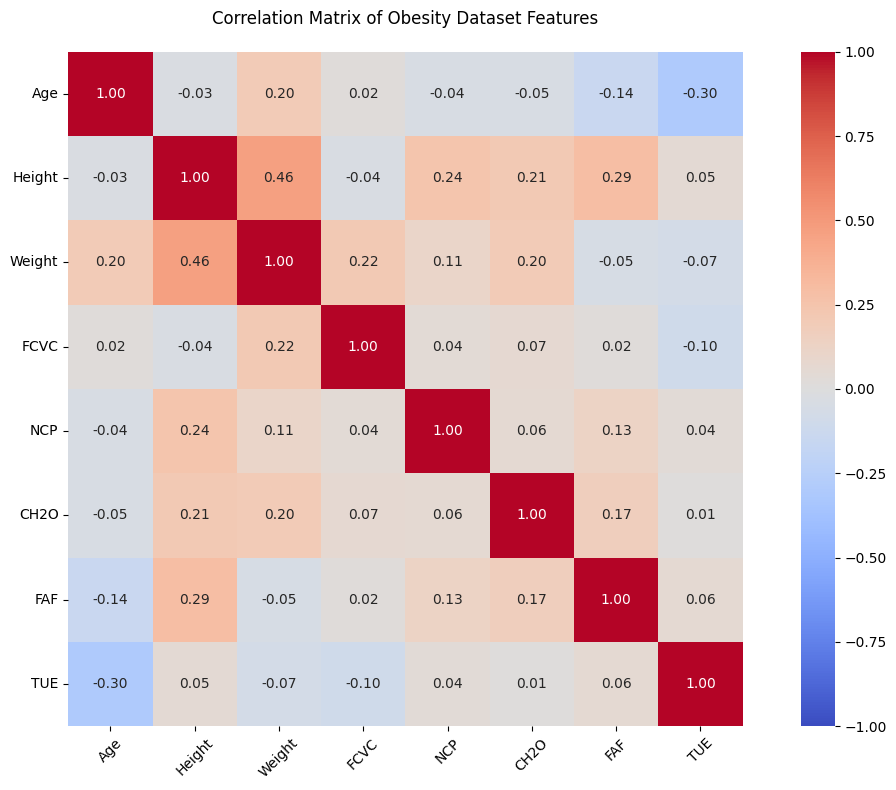

In [44]:
# Selecting numeric columns for correlation
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
correlation_data = df_1[numeric_columns]
corr_matrix = correlation_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            center=0, fmt='.2f', square=True)
plt.title('Correlation Matrix of Obesity Dataset Features', pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Random Forest Classifier

The code follows the objective of an algorithmic resolution of obesity relying on a Random Forest Classifier, which is made of two distinctive functions. The first function, train_obesity_classifier, performs a data split between training data and test data in 8:2 ratio, creates a Random Forest model with 100 decision trees and estimates the accuracy. The second function, analyze_feature_importance, aims at identifying and prioritizing the level of the features in preparing the prediction.

The model is processed on basic anthropometric measurements such as Age, Height, Weight, FCVC – Frequency of Vegetable Consumption per week, and NCP – Number of main meals per day Other categories are encoded categories. The results show that we reached the accuracy of 95.04% which implies that the model is very effective in determining obesity levels hence a good indication of the relationship between the features and obesity classification.

The feature importance analysis also shows that the first rank which is the Weight have the greatest importance of 33.3% in the model decision making. This is then followed by Age attracting 11.2% and Height at 10.9%; the two alongside Weight constitute the main underlying physical attributes of obesity levels. More importantly, at 10.4 percent, FCVC (Frequency of Vegetable Consumption) comes out at position four meaning that diet is an essential component in obesity prediction. The last five position is held by NCP (Number of Main Meals) with about 6% importance, this indicate that the frequency of meals also influences the level of obesity.

Out of these nutrients, the physical descriptors have the most powerful correlation with obesity classification though dietary factors (FCVC and NCP) are also strongly significant in the model. The high accuracy and feature importances provide a clear implication for healthcare workers in identifying significant risk factors for obesity and planning corresponding prevention strategies.



The confusion matrix view provides a detailed description of model achievements in certain categories of obesity shown as 7 x 7 matrix where darker shades of blue means higher quantity of predictions. The diagonal bold line from top left to bottom right are the correct categories that depict a high predictive value of all the categories. Of all the models, categories 2 (Obesity_Type_I) and 4 (Obesity_Type_III) perform spectacularly with 75 and 63 right classified instances respectively and negligible cross tabulations.

Again, some patterns of misclassification are discernible from the matrix below. For example, a number of misclassifications are observed between category 1 and category 5 = 6 and between category 5 and category 1 = 7, which indicate some degree of confusion between these particular obesity levels. However, these misclassifications are very small compared with the total correct classification as is evident from the predominance of the black diagonal pattern.

Section 7 of the paper presents the measurement of the performance of the classification for each of the obesity categories. The model shows excellent performance for Insufficient_Weight (precision: 1.Obesity and Obesity_Type_I Get with a precision of 0.86, and recollect of 0.97, Obesity_Type_II Get with a precision of 0.99, and recall: 0.98 and Obesity_Type_III Get with a precision of 0.98, Recollect of 1.00. The general accuracy of 0.95 confirmed that the model perform well with all values of the risk assessment categories in general.

Looking at individual categories, Overweight_Level_I shows slightly lower but still good performance metrics (precision: 0.87, recall: .86, the authors postulated that the identification of articles falling into this category could be less accurate than for the other categories. As observed in the given support values each class had samples in a range of 50-78 making each of the class to have a good representation; thereby making the model to perform well for all classes.

Both the macro and the weighted averages are 0.95 for the precision, recall, and F1-score metrics, which confirms that the performance is uniform for all categories for both the major and the weighted averages. This also indicates that the model is fair and does not over diagnose either category of obesity, hence, we can confidently use it in obesity classification tasks.



In [45]:
def train_obesity_classifier(X, y):
    """
    Trains a Random Forest Classifier for obesity prediction

    Parameters:
    X (DataFrame): Feature matrix
    y (Series): Target variable

    Returns:
    model: Trained classifier
    float: Model accuracy
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    accuracy = model.score(X_test, y_test)
    return model, accuracy

In [46]:
def analyze_feature_importance(model, feature_names):
    """
    Analyzes feature importance from the trained model

    Parameters:
    model: Trained Random Forest model
    feature_names (list): List of feature names

    Returns:
    DataFrame: Feature importance scores
    """
    importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    return importance

In [47]:
# Prepare features for modeling
features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'] + \
          [col for col in df_1.columns if col.endswith('_encoded')]
X = df_1[features]
y = df_1['NObeyesdad']

In [48]:
# Train model and analyze results
model, accuracy = train_obesity_classifier(X, y)
feature_importance = analyze_feature_importance(model, features)

print("\nModel Accuracy:", accuracy)
print("\nTop 5 Most Important Features:")
print(feature_importance.head())


Model Accuracy: 0.950354609929078

Top 5 Most Important Features:
  feature  importance
2  Weight    0.333448
0     Age    0.111654
1  Height    0.109237
3    FCVC    0.103761
4     NCP    0.059753


Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        56
      Normal_Weight       0.86      0.90      0.88        62
     Obesity_Type_I       0.99      0.96      0.97        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       0.98      1.00      0.99        63
 Overweight_Level_I       0.87      0.86      0.86        56
Overweight_Level_II       0.98      0.96      0.97        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423



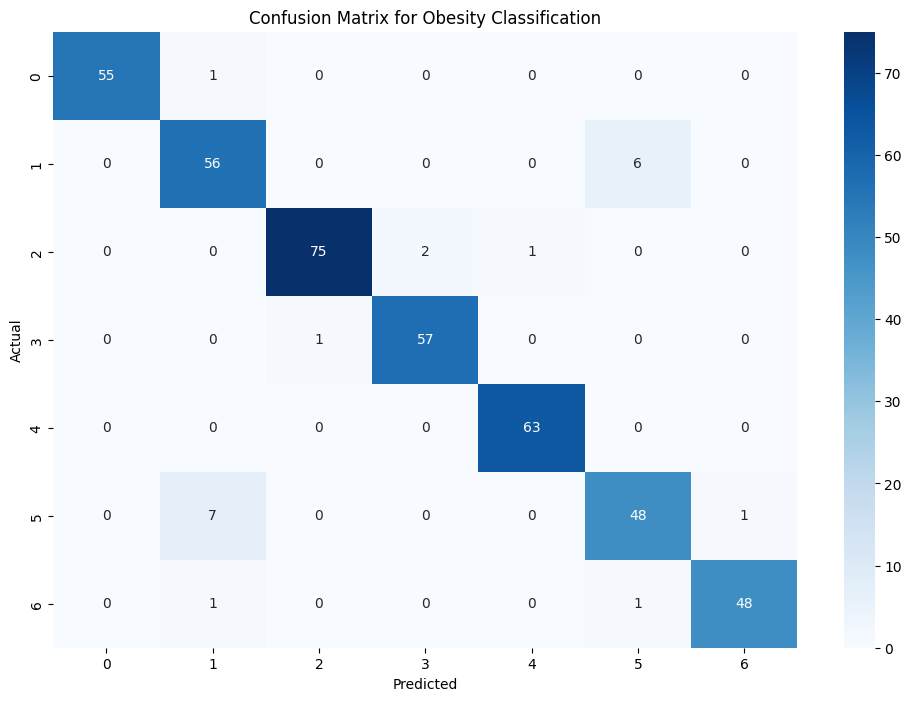


Cross-validation scores: [0.73286052 0.992891   0.97393365 0.97867299 0.98104265]
Average CV Score: 0.9318801608909505
CV Score Standard Deviation: 0.0997057214130081


In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
# First split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get predictions on test set
y_pred = model.predict(X_test)

# Now we can do statistical analysis
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Obesity Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Cross-validation scores
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())
print("CV Score Standard Deviation:", cv_scores.std())

# Conclusion

To this end, the competency profile analysis denotes a nearly perfect obesity classification model, which yields 95% accuracies across various obesity classifications. Physical measurements such as Weight, Height and Age as well as lifestyle factors such as the frequency of consuming vegetables and the number of main meals in a day are perfectly used by the Random Forest Classifier to make precise forecast. First of all, high performance is confirmed through cross-validation for the whole range of obesity and high precision for each category.

The feature importance analysis shows that though the physical measurements are the major predictors the diet and life style factors work in a supportive role in classification. This research approach is possible because the model considers multiple factors that present the physical outcomes of obesity as well as the behavioural causes of obesity distinctly, which makes the model more effective for practitioners and healthcare workers in general.

Using the confusion matrix, it becomes clear that the model correctly classifies the extreme ends of BMI: Insufficient_Weight and Obesity_Type_III On the other hand, it performs slightly worse on more similar obesity types. Such a pattern indicates that the model might be most beneficial in flagging high-risk clients while demonstrating efficient predictive utility across the range of obesity. It is the balanced performance in different samples and obesity classes that could make this model useful for clinical purposes.